## LOGISTIC REGRESSION

For the exercice, a csv file was creater in order to classify if a user who vitia web is a Windows, Macintosh or Linux user. We classify based on 4 features:

* Duration of the vist
* Number of visited websites
* Actions of the user(clicks, scroll, sliders etc)
* Sum of the actions value

We will assing to the output:

* 0: Windows
* 1: Macintosh
* 2: Linux

Our sample is 170 rows, very small, but it is enough in order to understand the Logistic Regression.

source: https://www.aprendemachinelearning.com/

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [6]:
# Reading the csv file

dataframe = pd.read_csv(r"usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [7]:
# Stadistic values

dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [8]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


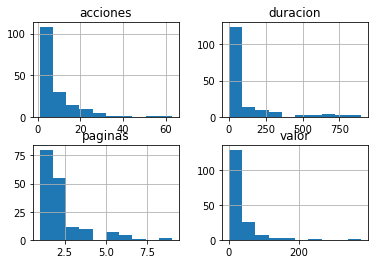

In [9]:
# Visualizing data
dataframe.drop(['clase'],1).hist()
plt.show()

C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


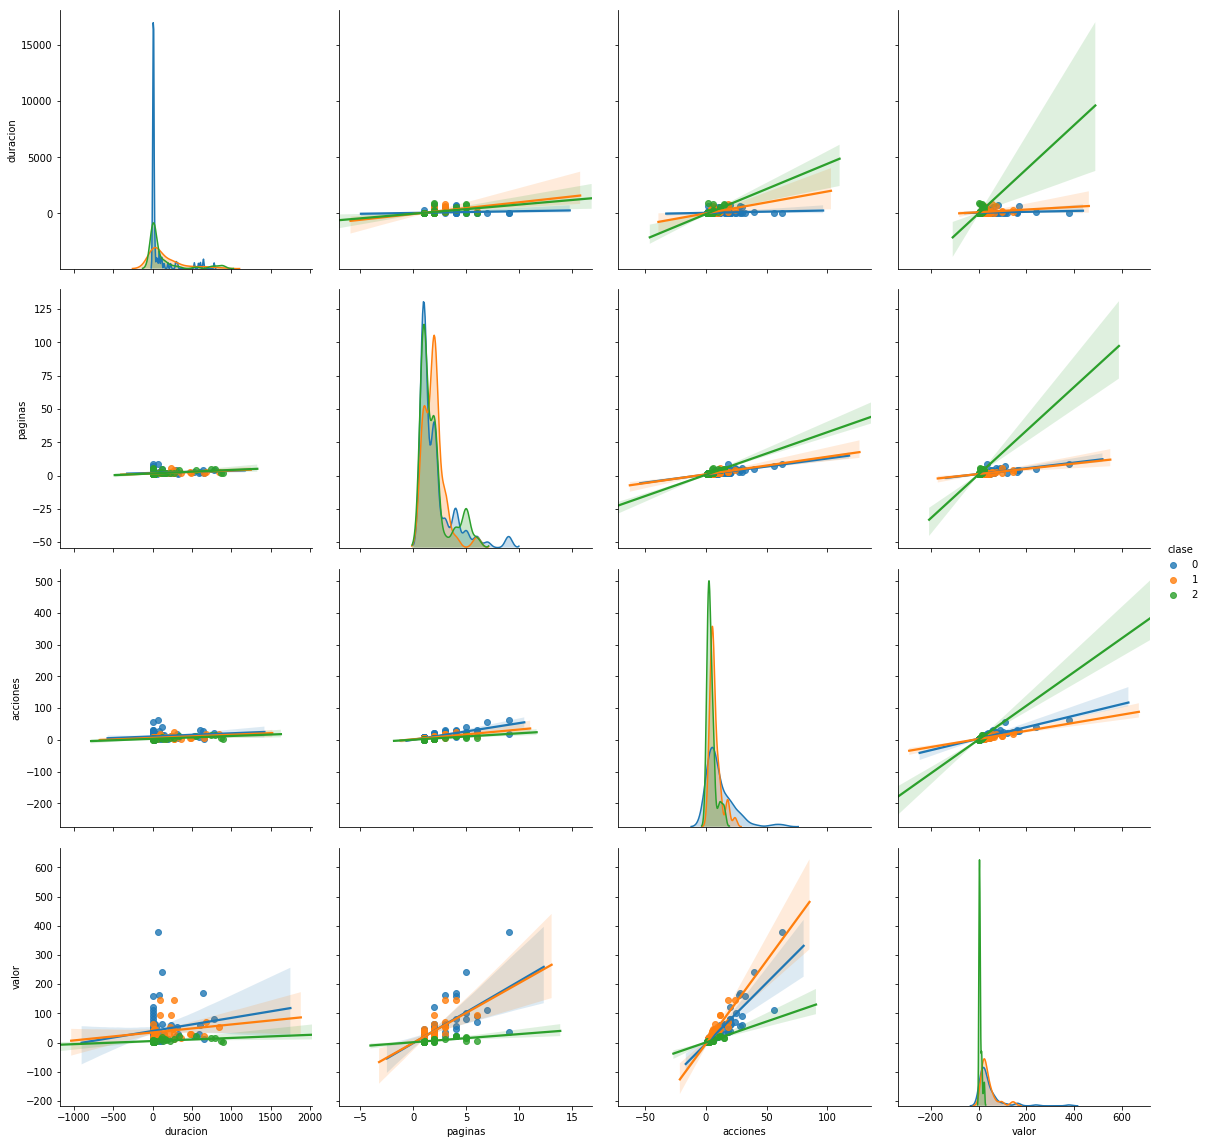

In [10]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg')

In [11]:
# Building the Logistic Regression Model

X = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [12]:
X

array([[  7.   ,   2.   ,   4.   ,   8.   ],
       [ 21.   ,   2.   ,   6.   ,   6.   ],
       [ 57.   ,   2.   ,   4.   ,   4.   ],
       [101.   ,   3.   ,   6.   ,  12.   ],
       [109.   ,   2.   ,   6.   ,  12.   ],
       [125.   ,   5.   ,  10.   ,  20.   ],
       [133.   ,   2.   ,   2.   ,   4.   ],
       [162.   ,   2.   ,   6.   ,  12.   ],
       [170.   ,   2.   ,   4.   ,   8.   ],
       [217.   ,   2.   ,   6.   ,   6.   ],
       [266.   ,   2.   ,   6.   ,  12.   ],
       [335.   ,   4.   ,  12.   ,  24.   ],
       [553.   ,   4.   ,  12.   ,  24.   ],
       [798.   ,   5.   ,  15.   ,  15.   ],
       [872.   ,   2.   ,   6.   ,   6.   ],
       [  1.105,   2.   ,   4.   ,   8.   ],
       [  2.091,   5.   ,   5.   ,   5.   ],
       [ 21.   ,   2.   ,   4.   ,  12.   ],
       [ 33.   ,   2.   ,   8.   ,  48.   ],
       [ 49.   ,   2.   ,   8.   ,  32.   ],
       [ 74.   ,   2.   ,   6.   ,  18.   ],
       [ 93.   ,   2.   ,  12.   ,  96.   ],
       [14

In [9]:
model = linear_model.LogisticRegression()
model.fit(X,y)

C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
# Predicting
predictions = model.predict(X)
print(predictions[0:5])

[2 2 2 2 2]


In [11]:
# Accuracy
model.score(X,y)

0.7764705882352941

Let's go to separate our dataset into a train split and a test split

In [13]:
# Building again the model

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [14]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.743407 (0.115752)


C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\0015658\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:

In [15]:
# Predicting

predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))


0.8529411764705882


In [16]:
print(confusion_matrix(Y_validation, predictions))

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


In [17]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

   micro avg       0.85      0.85      0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



In [18]:
X_new = pd.DataFrame({'duracion': [10], 'paginas': [3], 'acciones': [5], 'valor': [9]})
model.predict(X_new)


array([2], dtype=int64)